In [5]:
#Cargar librerías básicas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/Forrestino/Datasets-potenciales/refs/heads/main/US_Accidents_Dec21_V1.csv') # This line had an unexpected indent. Removing it fixes the issue.
print(df.head())


    ID  Severity        Start_Time          End_Time  Start_Lat  Start_Lng  \
0  A-1         3  08/02/2016 00:37  08/02/2016 06:37  40.108910 -83.092860   
1  A-2         2  08/02/2016 05:56  08/02/2016 11:56  39.865420 -84.062800   
2  A-3         2  08/02/2016 06:15  08/02/2016 12:15  39.102660 -84.524680   
3  A-4         2  08/02/2016 06:51  08/02/2016 12:51  41.062130 -81.537840   
4  A-5         3  08/02/2016 07:53  08/02/2016 13:53  39.172393 -84.492792   

     End_Lat    End_Lng  Distance(mi)  \
0  40.112060 -83.031870         3.230   
1  39.865010 -84.048730         0.747   
2  39.102090 -84.523960         0.055   
3  41.062170 -81.535470         0.123   
4  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 

El dataset incluye 47 columnas que detallan diversos aspectos de los accidentes, tales como:


*   Temporalidad: Fecha y hora de inicio y fin del accidente
*   Ubicación: Coordenadas geográficas, ciudad, estado y código postal.
*   Condiciones Climáticas: Temperatura, humedad, visibilidad, condiciones meteorológicas, entre otros.
*   Severidad: Nivel de impacto del accidente, en una escala del 1 al 4
*   Características de la Vía: Presencia de señales de tráfico, cruces, rotondas, etc.

Hipótesis
1. Relación entre Condiciones Climáticas y Severidad de Accidentes
Hipótesis: Las condiciones climáticas adversas, como lluvia intensa, nieve o niebla, aumentan la probabilidad de accidentes de mayor severidad.

Variables Relevantes: Weather_Condition, Precipitation(in), Visibility(mi), Severity.

2. Variación Temporal en la Frecuencia de Accidentes
Hipótesis: La frecuencia de accidentes varía según la hora del día y el día de la semana, siendo más alta durante las horas pico de tráfico.

Variables Relevantes: Start_Time, End_Time, Severity

3. Influencia de Características de la Vía en la Ocurrencia de Accidentes
Hipótesis: La presencia de elementos como señales de tráfico, cruces o rotondas puede influir en la frecuencia y severidad de los accidentes.

Variables Relevantes: Traffic_Signal, Crossing, Junction, Roundabout, Severity.
4. Distribución Geográfica de los Accidentes
Hipótesis: Ciertas regiones o estados presentan una mayor concentración de accidentes debido a factores como densidad poblacional o infraestructura vial.

Variables Relevantes: State, City, Start_Lat, Start_Lng.

5. Duración del Impacto del Accidente en el Tráfico
Hipótesis: Los accidentes más severos tienden a tener un impacto más prolongado en el flujo vehicular.

Variables Relevantes: Start_Time, End_Time, Severity.



----- Distribución de Severidad de Accidentes -----
Severity
2    2301
3     392
4     306
Name: count, dtype: int64


----- Accidentes por Estado -----
State
CA    2008
OH     624
IN     124
KY     108
PA      66
WV      52
MI      14
NV       3
Name: count, dtype: int64




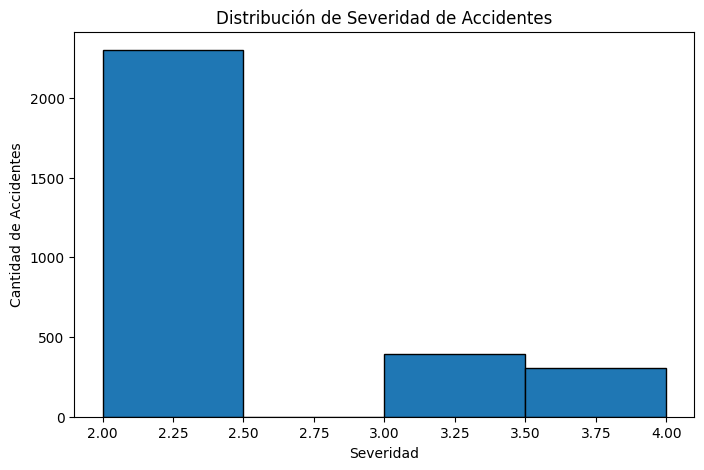

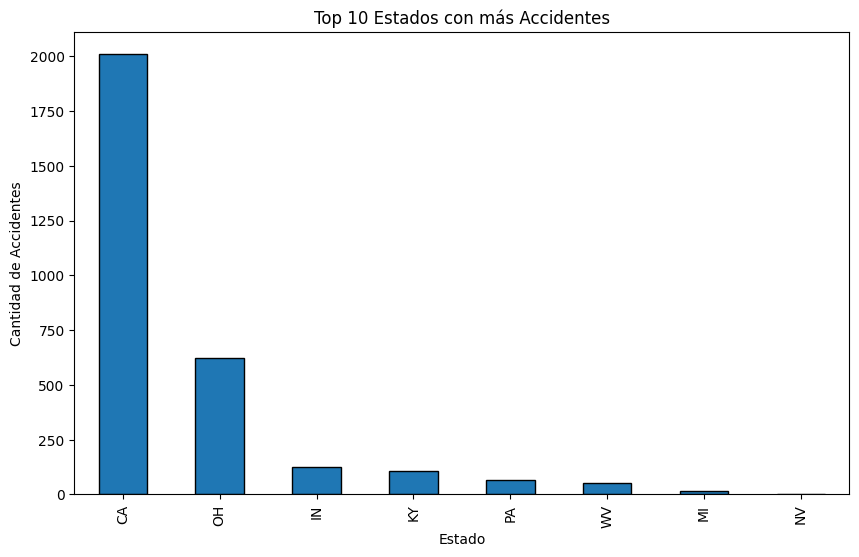

----- Accidentes por Condición Climática -----
Weather_Condition
Clear               1119
Overcast             543
Mostly Cloudy        413
Partly Cloudy        305
Scattered Clouds     277
Light Snow           118
Light Rain           108
Rain                  35
Haze                  14
Snow                  10
Name: count, dtype: int64




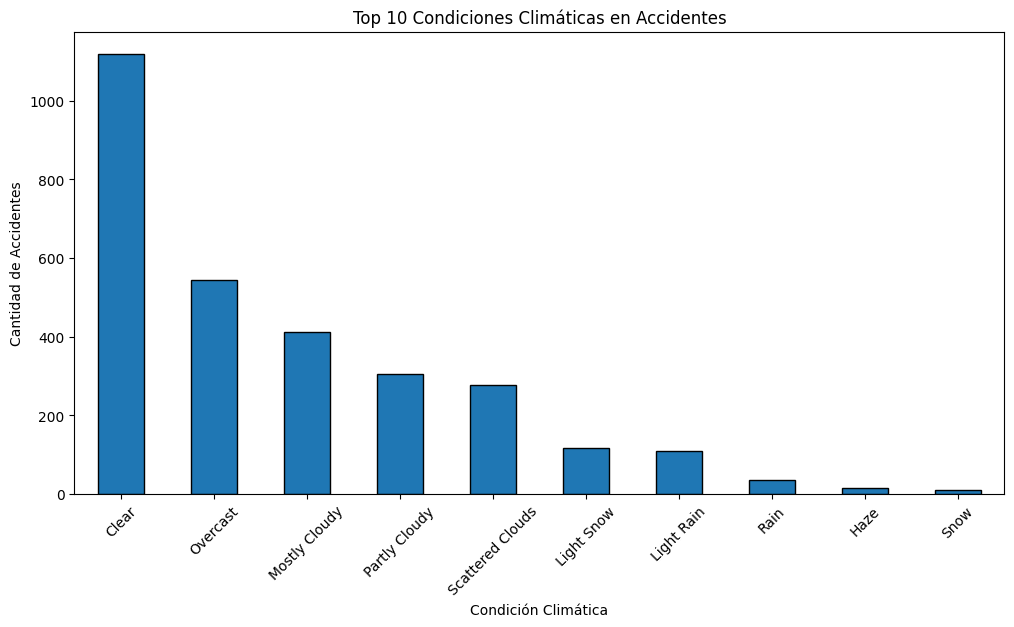

In [7]:
#Distribución de la variable target (Severity)
print("----- Distribución de Severidad de Accidentes -----")
print(df['Severity'].value_counts())
print("\n")
#Análisis de accidentes por estado
print("----- Accidentes por Estado -----")
print(df['State'].value_counts().head(10))  # Top 10 estados con más accidentes
print("\n")

# Histograma de la severidad de los accidentes
plt.figure(figsize=(8,5))
df['Severity'].hist(bins=4, edgecolor='black')
plt.title('Distribución de Severidad de Accidentes')
plt.xlabel('Severidad')
plt.ylabel('Cantidad de Accidentes')
plt.grid(False)
plt.show()

# Accidentes por estado (gráfico de barras)
plt.figure(figsize=(10,6))
df['State'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 Estados con más Accidentes')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Accidentes')
plt.grid(False)
plt.show()

#Accidentes por condición climática
print("----- Accidentes por Condición Climática -----")
print(df['Weather_Condition'].value_counts().head(10))  # Top 10 condiciones más frecuentes
print("\n")

# Visualización: Gráfico de barras de condición climatica
plt.figure(figsize=(12,6))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 Condiciones Climáticas en Accidentes')
plt.xlabel('Condición Climática')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()